# Dependencias

In [32]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq, fftshift
import matplotlib.pyplot as plt

def simular_pendulo(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval):
    y0 = [theta1_0, theta2_0, omega1_0, omega2_0]

    # Resolviendo la ecuación diferencial
    sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

    # Graficando los resultados del movimiento
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label=r'$\theta_1$ (rad)')
    plt.plot(sol.t, sol.y[1], label=r'$\theta_2$ (rad)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (rad)')
    plt.title('Movimiento de los péndulos acoplados')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Extrayendo los ángulos theta1 y theta2
    theta1 = sol.y[0]
    theta2 = sol.y[1]
    t = sol.t

    # Aplicando la Transformada de Fourier
    N = len(t)
    dt = t[1] - t[0]
    frequencies = fftfreq(N, dt)
    frequencies = fftshift(frequencies)

    fft_theta1 = fft(theta1)
    fft_theta2 = fft(theta2)

    power_spectrum_theta1 = np.abs(fftshift(fft_theta1)) ** 2
    power_spectrum_theta2 = np.abs(fftshift(fft_theta2)) ** 2

    # Graficando el Espectro de Potencias de Fourier en escala logarítmica
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(frequencies, power_spectrum_theta1)
    plt.xlim([-1e-1, 5])
    plt.yscale('log')
    plt.title(r'Espectro de Potencias de Fourier ($\theta_1$)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')

    plt.subplot(2, 1, 2)
    plt.plot(frequencies, power_spectrum_theta2)
    plt.xlim([-1e-1, 5])
    plt.yscale('log')
    plt.title(r'Espectro de Potencias de Fourier ($\theta_2$)')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Potencia')

    plt.tight_layout()
    plt.show()

    # Generando espectrogramas
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.specgram(theta1, Fs=1/dt, NFFT=256, noverlap=128, cmap='viridis')
    plt.title(r'Espectrograma de $\theta_1$')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.colorbar(label='Potencia')

    plt.subplot(2, 1, 2)
    plt.specgram(theta2, Fs=1/dt, NFFT=256, noverlap=128, cmap='viridis')
    plt.title(r'Espectrograma de $\theta_2$')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.colorbar(label='Potencia')

    plt.tight_layout()
    plt.show()

# Definición de Parametros y Condiciones Iniciales

In [54]:
# Parámetros globales (puedes ajustar según sea necesario)
m = 1.0  # masa
g = - 9.81  # aceleración gravitacional
l = 1.0  # longitud del péndulo
k = 20.0  # constante elástica
s = 1.0  # distancia entre pivotes
d0 = 0.6  # longitud natural del resorte
c1 = 1.0  # relación m2 = c1*m1
c2 = 1.0  # relación l2 = c2*l1

# Condiciones iniciales
theta1_0 = - np.pi / 4
theta2_0 = - np.pi / 3
omega1_0 = 0.0
omega2_0 = 0.0
t_span = (0, 10)  # Intervalo de tiempo para la simulación
t_eval = np.linspace(t_span[0], t_span[1], 100000)

# Condiciones iniciales para angulos pequeños (sa = small_angles)
theta1_0_sa = - np.pi / 2 + 0.0915  # Ángulo inicial para theta1 angulos pequeños
theta2_0_sa = - np.pi / 2 + 0.06075 # Ángulo inicial para theta2 angulos pequeños

# Ejercicio 2 - Integre numéricamente el sistema de ecuaciones e identifique los parámetros que condicionan el sistema.

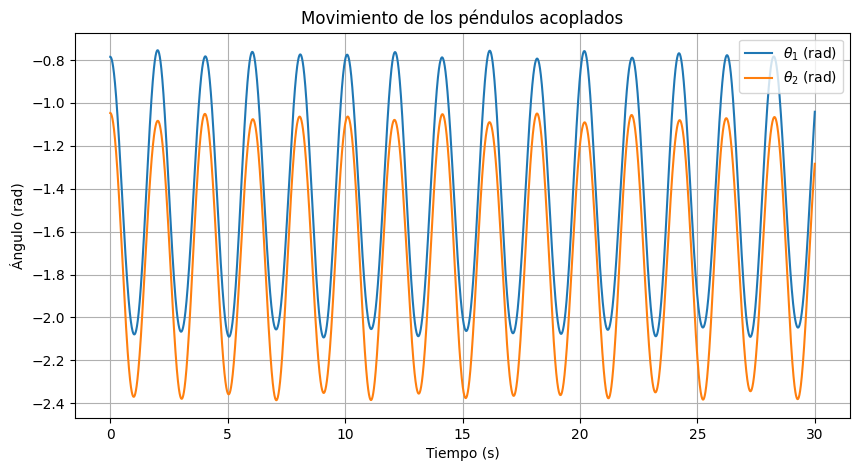

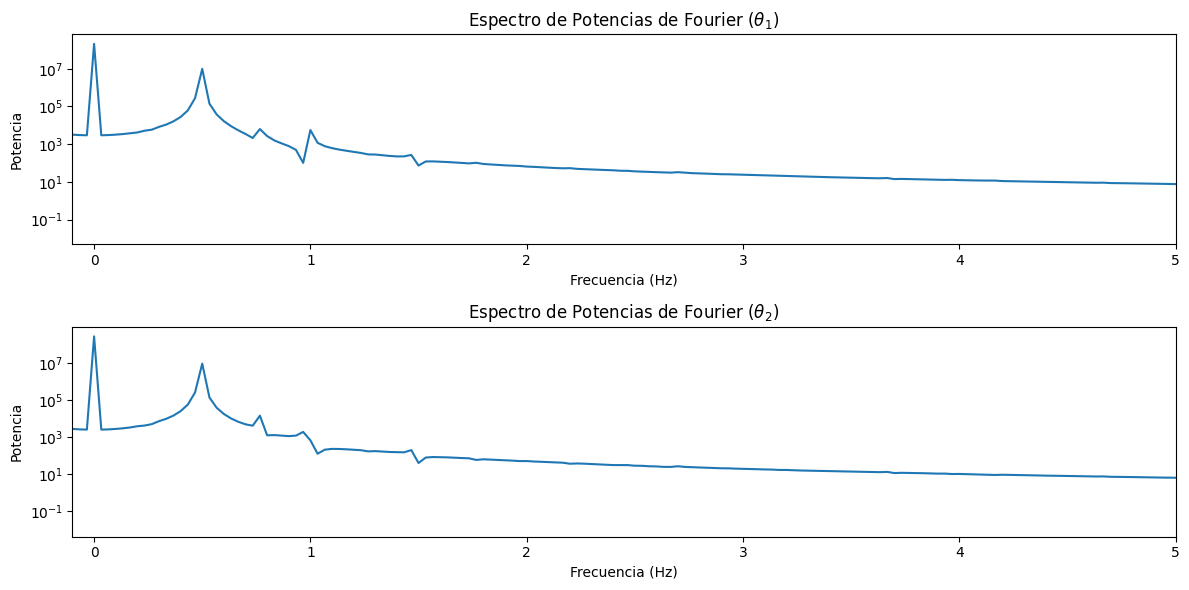

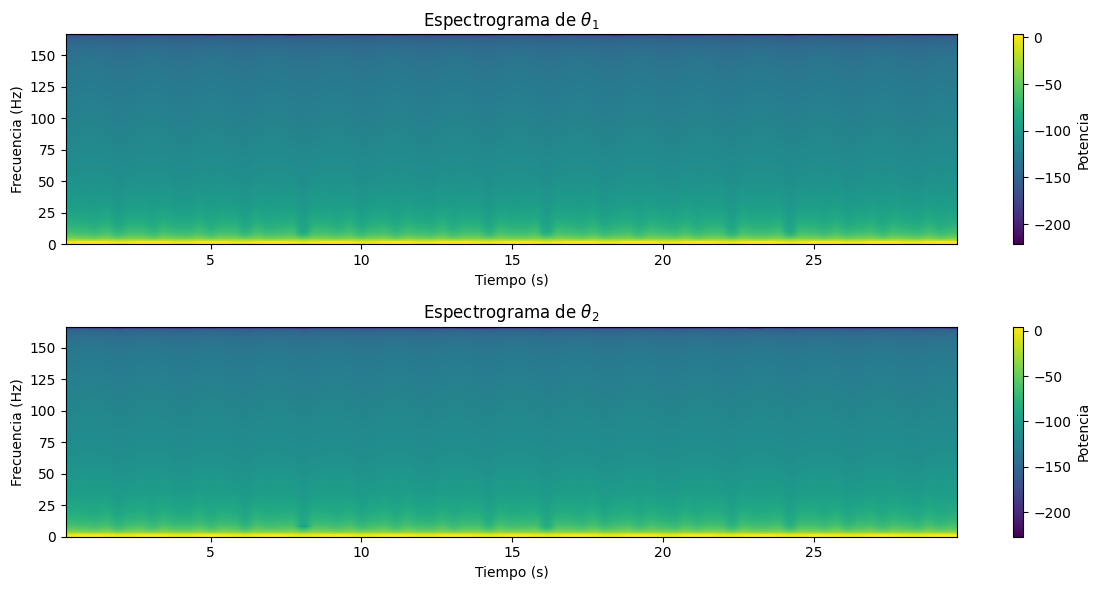

In [44]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    delta_theta = theta2 - theta1
    sin_delta_theta = np.sin(delta_theta)
    cos_delta_theta = np.cos(delta_theta)

    common_term = np.sqrt( 2 * l ** 2 * (1 - np.cos(delta_theta)) + s * l * (np.cos(theta2) - np.cos(theta1)) + s ** 2 )
    force_term = (
        k
        * (-2 * l ** 2 * np.sin(delta_theta) + l * s * np.sin(theta1))
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l * np.cos(theta1) - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * (2 * l ** 2 * np.sin(delta_theta) - l * s * np.sin(theta2))
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (m * g * l * np.cos(theta2) - 0.5 * force_term_2) / (m * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval)

# Ejercicio 3.1 - Resorte conectado a la mitad de las varillas

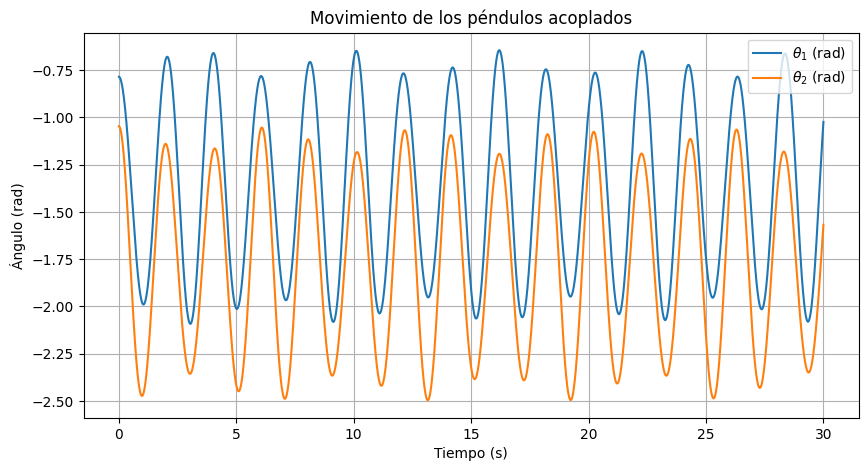

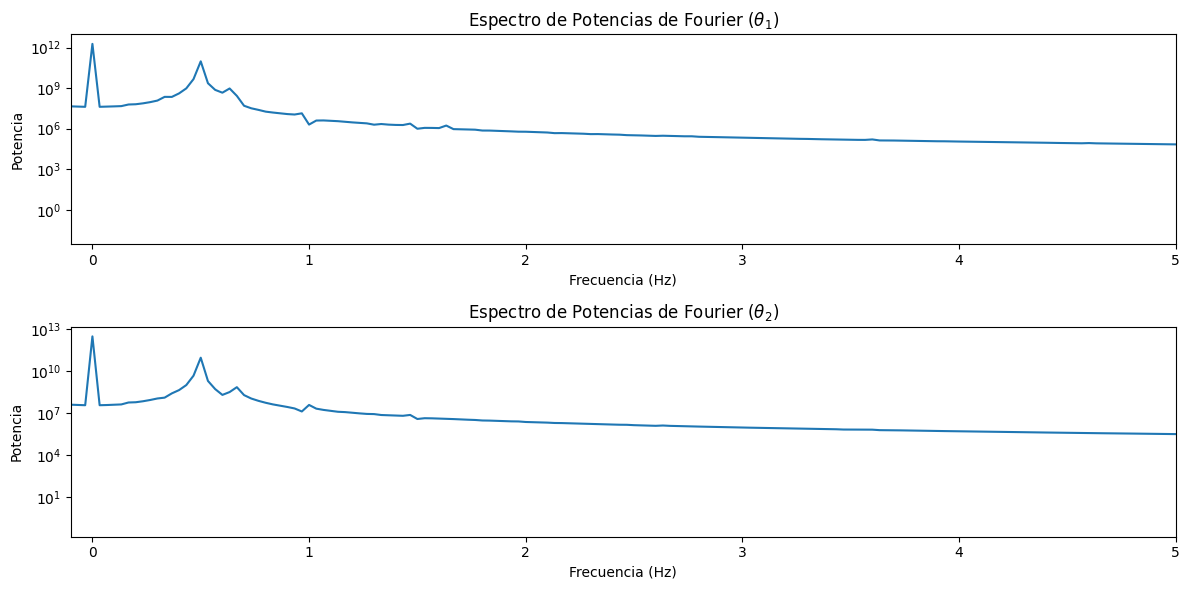

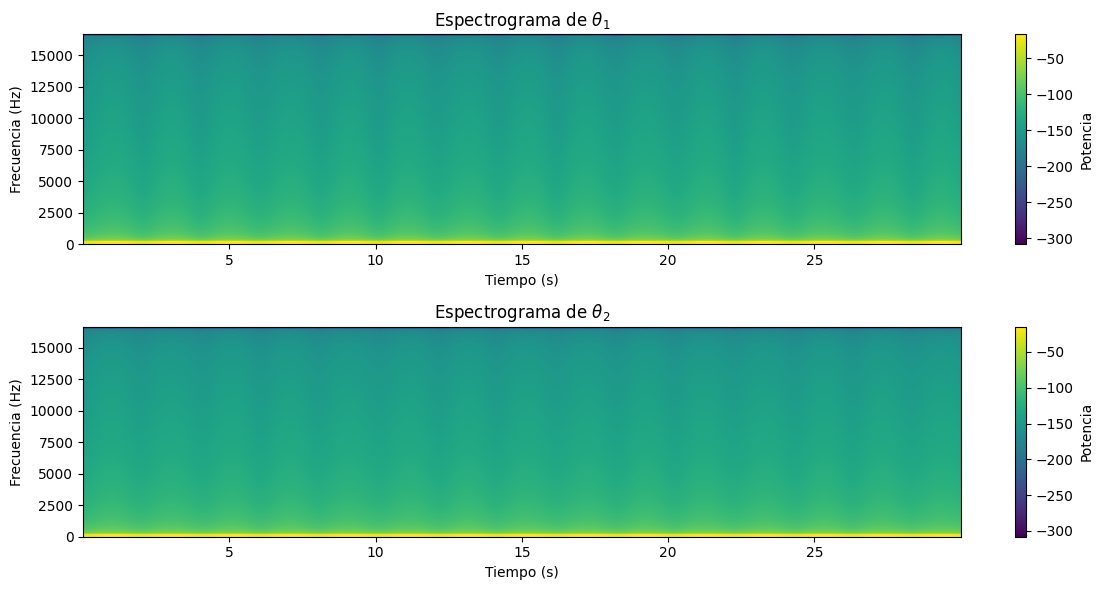

In [21]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    delta_theta = theta2 - theta1
    sin_delta_theta = np.sin(delta_theta)
    cos_delta_theta = np.cos(delta_theta)

    common_term = np.sqrt( l ** 2 / 2 * ( 1 - cos_delta_theta ) + l * s * (np.cos(theta2) - np.cos(theta1)) + s ** 2 )
    force_term = (
        k
        * ( -l ** 2 / 2 * np.sin(delta_theta) + l * s * np.sin(theta1) )
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l * np.cos(theta1) - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * ( l ** 2 / 2 * np.sin(delta_theta) - l * s * np.sin(theta2) )
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (m * g * l * np.cos(theta2) - 0.5 * force_term_2) / (m * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval)

# Ejercicio 3.2 - Resorte conectado a masas con longitudes y masas diferentes

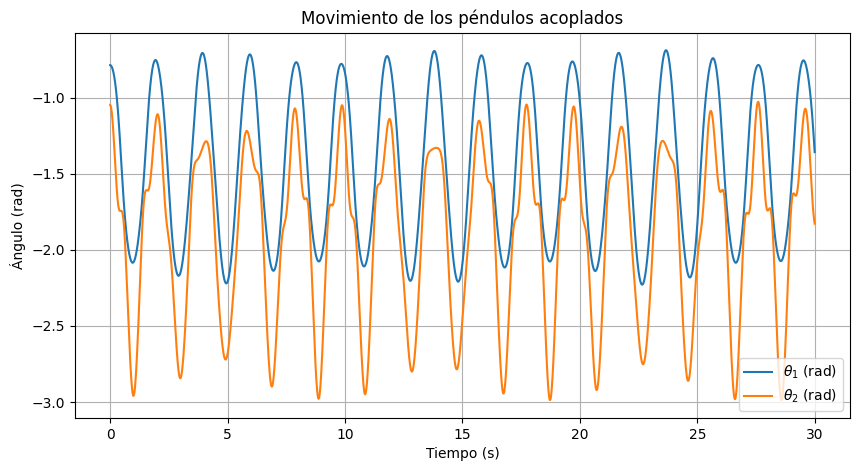

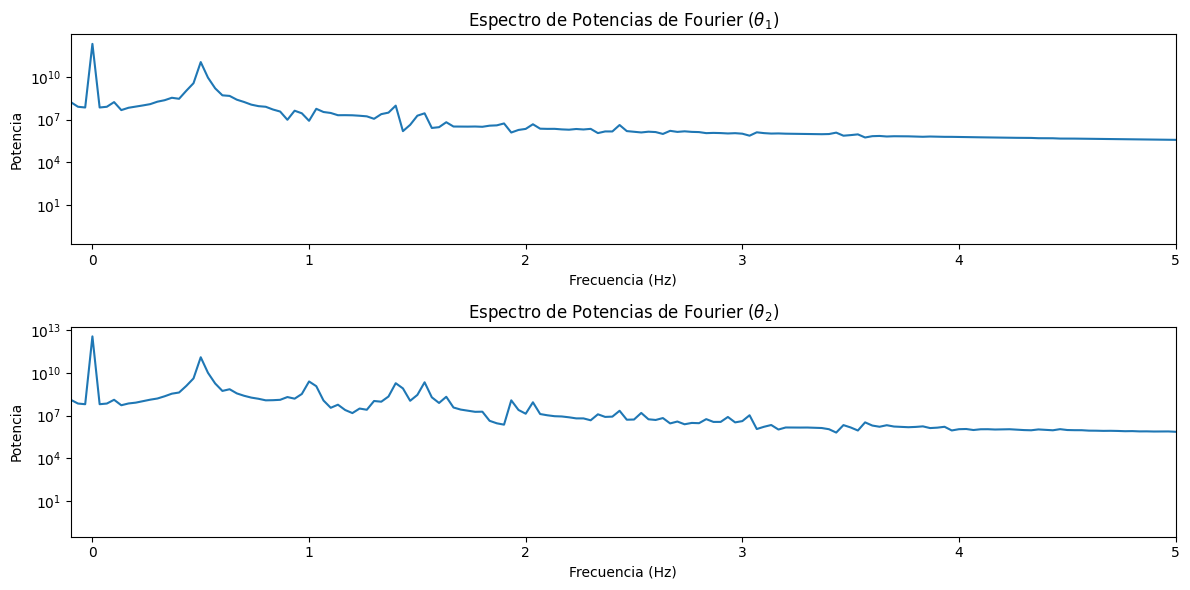

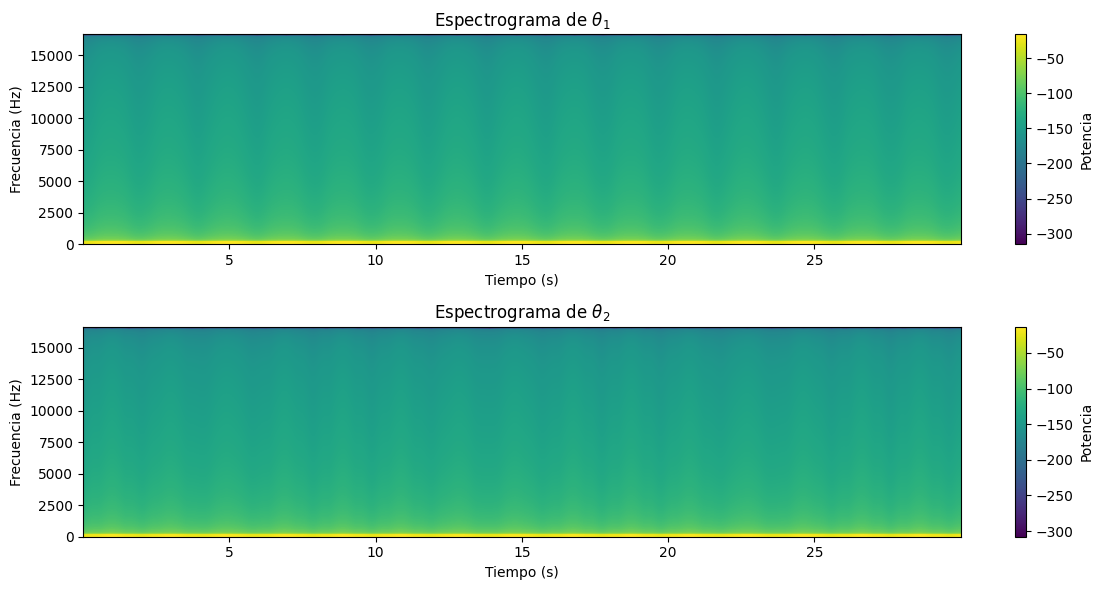

In [19]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    delta_theta = theta2 - theta1
    sin_delta_theta = np.sin(delta_theta)
    cos_delta_theta = np.cos(delta_theta)

    common_term = np.sqrt( l ** 2 * (1 + c2 ** 2 - 2 * c2 * np.cos(delta_theta)) + 2 * l * s * (c2 * np.cos(theta2) - np.cos(theta1)) + s ** 2 )
    force_term = (
        k
        * (-2 * c2 * l ** 2 * np.sin(delta_theta) + 2 * l * s * np.sin(theta1))
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l * np.cos(theta1) - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * (2 * c2 * l ** 2 * np.sin(delta_theta) - 2 * c2 * l * s * np.sin(theta2))
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (c1 * m * g * c2 * l * np.cos(theta2) - 0.5 * force_term_2) / (c1 * m * c2 ** 2 * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval)

# Ejercicio 6.2.1 - Angulos pequeños para resorte conectado a las masas

In [45]:
def simular_pendulo_small(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval):
    y0 = [theta1_0, theta2_0, omega1_0, omega2_0]

    # Resolviendo la ecuación diferencial
    sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

    # Graficando los resultados del movimiento
    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label=r'$\theta_1$ (rad)')
    plt.plot(sol.t, sol.y[1], label=r'$\theta_2$ (rad)')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Ángulo (rad)')
    plt.title('Movimiento de los péndulos acoplados')
    plt.legend()
    plt.grid(True)
    plt.show()

In [48]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    delta_theta = theta2 - theta1
    sin_delta_theta = np.sin(delta_theta)
    cos_delta_theta = np.cos(delta_theta)

    common_term = np.sqrt( 2 * l ** 2 * (- theta2 * theta1) + s ** 2 )

    force_term = (
        k
        * (-2 * l ** 2 * delta_theta + l * s * theta1)
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * (2 * l ** 2 * delta_theta - l * s * theta2)
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (m * g * l - 0.5 * force_term_2) / (m * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo_small(theta1_0_sa, theta2_0_sa, omega1_0, omega2_0, t_span, t_eval)

/tmp/ipykernel_245/2494238063.py:8: RuntimeWarning: invalid value encountered in sqrt
  common_term = np.sqrt( 2 * l ** 2 * (- theta2 * theta1) + s ** 2 )


KeyboardInterrupt: 

# Ejercicio 6.3.1 - Angulos pequeños para resorte conectado la mitad de las varillas

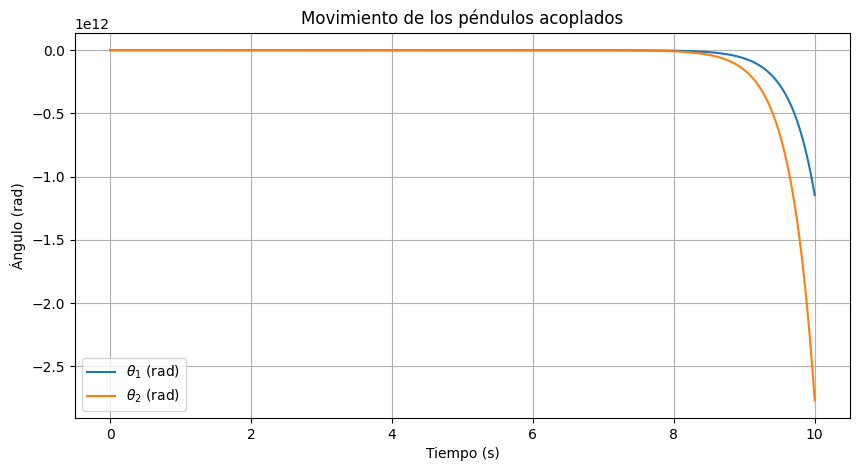

In [55]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    delta_theta = theta2 - theta1
    sin_delta_theta = np.sin(delta_theta)
    cos_delta_theta = np.cos(delta_theta)

    common_term = np.sqrt( 2 * l ** 2 * (1 - delta_theta) + s ** 2 )
    force_term = (
        k
        * (-2 * l ** 2 * delta_theta + 2 * l * s * theta1)
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * (2 * l ** 2 * delta_theta - 2 * l * s * theta2)
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (c1 * m * g * l - 0.5 * force_term_2) / (c1 * m * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo_small(theta1_0, theta2_0, omega1_0, omega2_0, t_span, t_eval)

# Ejercicio 6.3.2 - Angulos pequeños para resorte conectado a las masas con longitudes y masas diferentes

In [29]:
def equations(t, y):
    theta1, theta2, omega1, omega2 = y

    common_term = np.sqrt( l ** 2 * (1 + c2 ** 2 - 2 * c2 * (theta1 * theta2 + 1)) + 2 * l * s * (c2 - 1) + s ** 2)
    force_term = (
        k
        * (-2 * c2 * l ** 2 * theta2)
        * (common_term - d0)
        / common_term
    )

    dtheta1_dt = omega1
    domega1_dt = (m * g * l - 0.5 * force_term) / (m * l ** 2)

    force_term_2 = (
        k
        * (-2 * c2 * l ** 2 * theta1)
        * (common_term - d0)
        / common_term
    )
    dtheta2_dt = omega2
    domega2_dt = (c1 * m * g * c2 * l - 0.5 * force_term_2) / (c1 * m * c2 ** 2 * l ** 2)

    return [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

# Llamada a la función
simular_pendulo_small(theta1_0_sa, theta2_0_sa, omega1_0, omega2_0, t_span, t_eval)

/tmp/ipykernel_245/401715999.py:4: RuntimeWarning: invalid value encountered in sqrt
  common_term = np.sqrt( l ** 2 * (1 + c2 ** 2 - 2 * c2 * (theta1 * theta2 + 1)) + 2 * l * s * (c2 - 1) + s ** 2)


KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff8ad349-14ae-4105-b717-f9feed4f0ee2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>